In [1]:
import imp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import 

In [2]:
df= pd.read_csv(r'C:\Users\admin\Desktop\ML training\day_21\housing\housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df['Address'].nunique()

5000

In [10]:
df['Price'].nunique()

5000

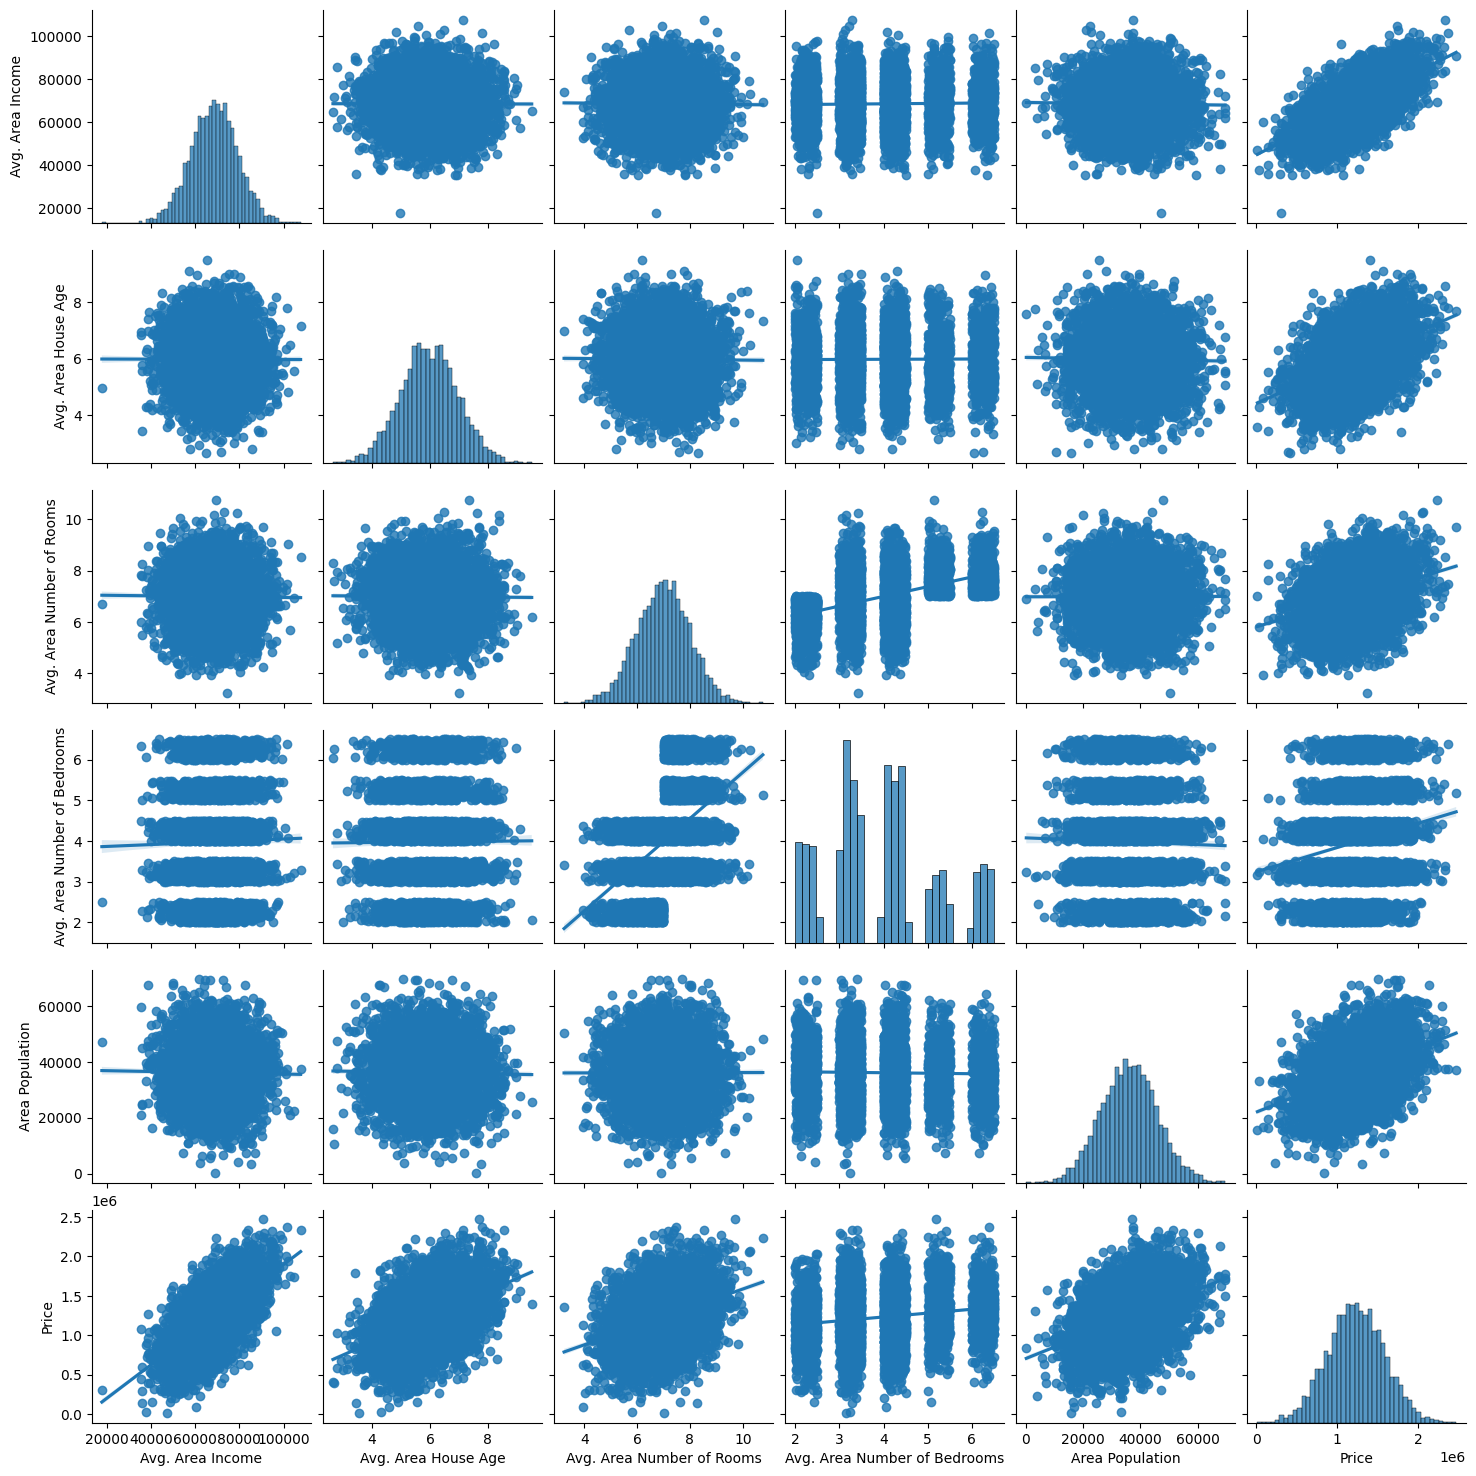

In [15]:
sns.pairplot(data=df, kind='reg')

C:\Users\admin\AppData\Local\Temp\ipykernel_5592\1305659618.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot= True)


<AxesSubplot:>

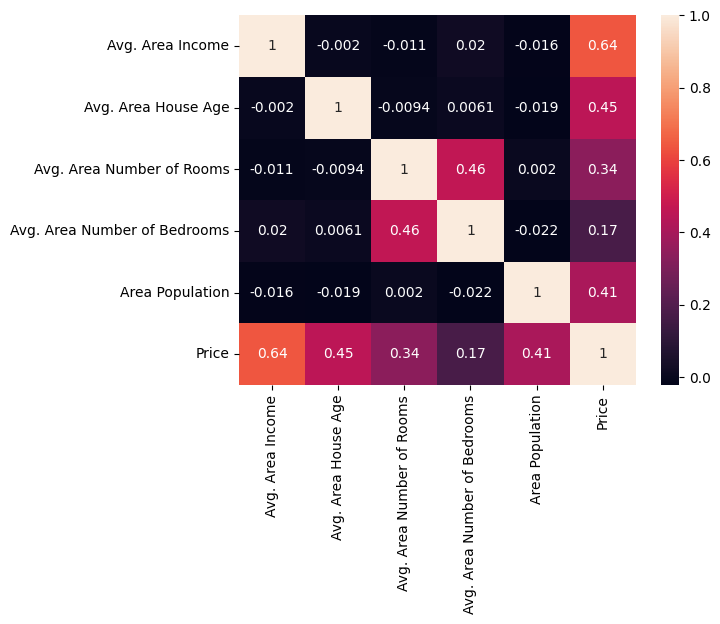

In [14]:
sns.heatmap(df.corr(),annot= True)

In [11]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [22]:
from pyexpat import features


target= df['Price']
features= df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(
    features, target, test_size = 0.25,random_state=101
)

In [24]:
xtrain.shape

(3750, 4)

In [28]:
xtest.shape

(1250, 4)

In [29]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [30]:
model.score(xtest,ytest) * 100

91.70576659270544

In [31]:
model.predict(xtest)

array([1258976.14439243,  819807.04069244, 1744036.82861755, ...,
       1120117.23028053,  719104.76042941, 1515037.95026329])

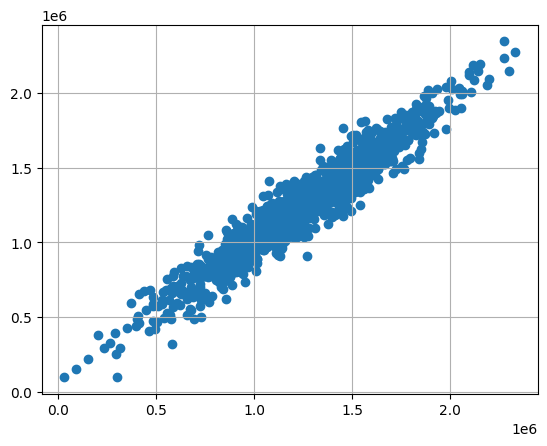

In [32]:
ypred_test = model.predict(xtest)
plt.scatter(ytest,ypred_test)
plt.grid()

In [34]:
xtrain.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population'],
      dtype='object')

In [35]:
query_data= {'Avg. Area Income':[200000],'Avg. Area House Age':[6],'Avg. Area Number of Rooms':[5], 'Area Population':[30000]}

result= model.predict(pd.DataFrame(query_data))
print(result[0])

3743363.824275545


In [36]:
pd.to_pickle(model,'housePrice.pickle')
